 hours studied and the test scores students achieved

In [31]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [32]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/azhar2ds/DataSets/master/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
# shape of the DataFrame
data.shape

(200, 4)

In [34]:
# visualize the relationship between the features and the response using scatterplots


C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


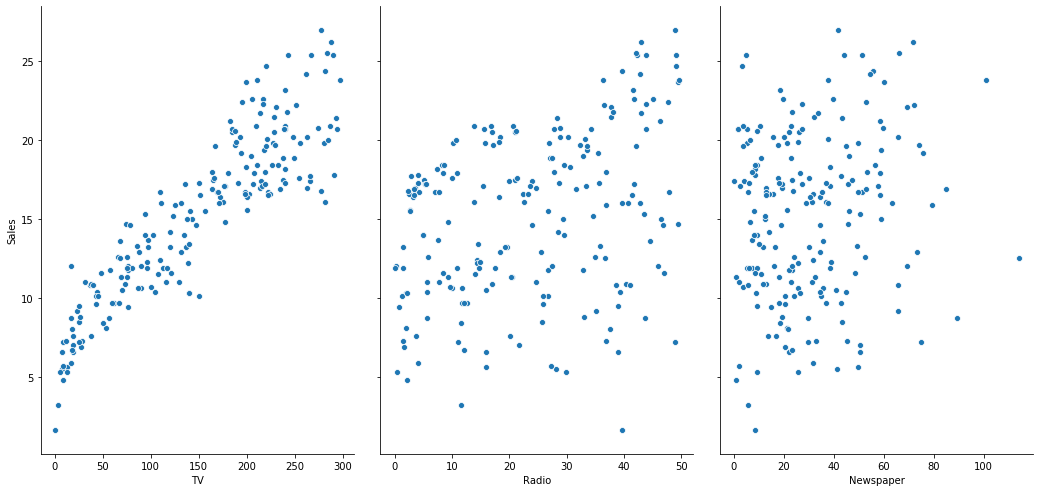

In [35]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

In [36]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    6.974821
TV           0.055465
dtype: float64

In [37]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

6.974821488229891
[0.05546477]


8. Using the Model for Prediction
Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

y=β0+β1x
 
y=7.032594+0.047537×50
 
We would use 50 instead of 50,000 because the original data consists of examples that are divided by 1000



In [38]:
#Manual Prediction
7.032594 + 0.047537*50

9.409444

In [39]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new

In [40]:
#Scikit-learn Prediction

### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(50)

ValueError: Expected 2D array, got scalar array instead:
array=50.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


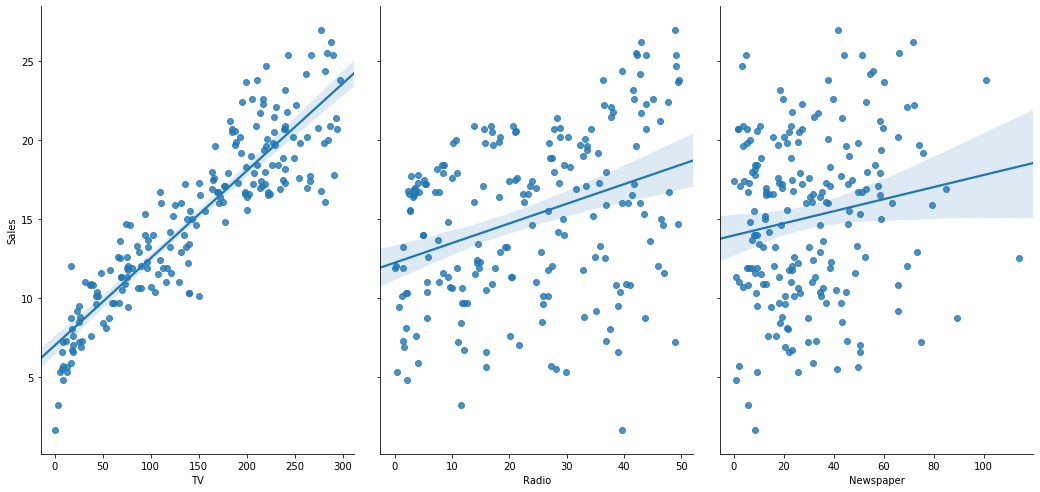

In [42]:
#Plotting the Least Squares Line
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [43]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [44]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [45]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.8121757029987414

In [46]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X, y)

0.8121757029987413

 Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

y=β0+β1x1+...+βnxn 
Each  x  represents a different feature, and each feature has its own coefficient. In this case:

y=β0+β1×TV+β2×Radio+β3×Newspaper 
Let's estimate these coefficients

In [47]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [48]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [49]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.054445780337570936),
 ('Radio', 0.10700122823870296),
 ('Newspaper', 0.00033565792233056224)]

In [50]:

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           8.13e-99
Time:                        16:19:52   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Volume in drive C has no label.
 Volume Serial Number is EA07-3B73

 Directory of C:\Users\Azhar\Downloads\Notebooks

03/08/2020  04:21 PM    <DIR>          .
03/08/2020  04:21 PM    <DIR>          ..
03/08/2020  04:21 PM    <DIR>          .ipynb_checkpoints
04/15/2019  12:21 PM            47,330 100-pandas-puzzles-with-solutions.ipynb
03/06/2020  04:07 PM           309,249 LinReg_withLosfuncInJupyterNB.ipynb
03/08/2020  04:21 PM           144,044 lin_regrression.ipynb
03/06/2020  10:19 PM            67,265 Matplotlib Workbook .ipynb
03/06/2020  09:15 PM            44,772 My Pandas excercise.ipynb
03/06/2020  02:26 PM            64,123 Numpy_Exercise_workbook.ipynb
03/08/2020  03:42 PM    <DIR>          raw.githubusercontent.com
11/08/2019  01:04 PM             3,272 Seaborn Workbook (1).ipynb
               7 File(s)        680,055 bytes
               4 Dir(s)  16,851,304,448 bytes free
